# Redes neuronales con base de datos MNIST Digits

### Precarga de los datos

In [1]:
import keras
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train_im = x_train.copy()
x_test_im = x_test.copy()

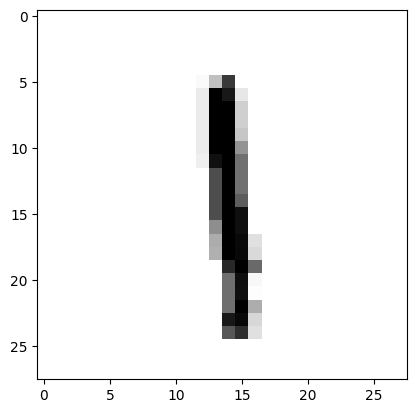

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train_im[8], cmap=plt.cm.binary)

In [5]:
print(y_train[8])

1


In [6]:
print(x_train.ndim)

3


In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
print(x_train.dtype)

uint8


In [9]:
my_slice = x_train[1:100, :]
print(my_slice.shape)

(99, 28, 28)


In [10]:
my_slice = x_train[1:100, 0:28, 0:28]
print(my_slice.shape)

(99, 28, 28)


In [11]:
my_slice = x_train[:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [12]:
my_slice = x_train[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)


In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [15]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
print(y_test[0])

7


In [18]:
print(y_train[0])

5


In [19]:
print(y_train.shape)

(60000,)


In [20]:
print(x_test.shape)

(10000, 784)


In [21]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [22]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
print(y_train.shape)

(60000, 10)


In [24]:
print(y_test.shape)

(10000, 10)


### Definición del modelo

In [25]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation=('relu'), input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

c:\Mis Proyectos\Git\Books\Niflheim\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.7631 - loss: 0.9723
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9086 - loss: 0.3343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9207 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.9297 - loss: 0.2489
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9373 - loss: 0.2266


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9333 - loss: 0.2388


In [30]:
print("Test accuracy:", test_acc)

Test accuracy: 0.942799985408783


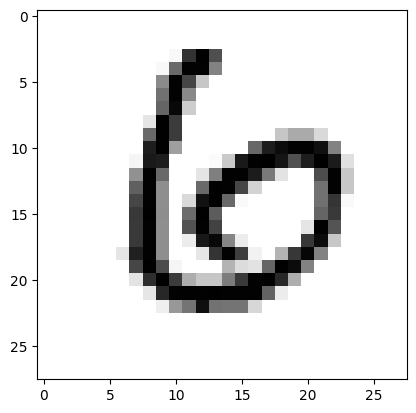

In [31]:
plt.imshow(x_test_im[11], cmap=plt.cm.binary)

In [32]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


In [33]:
np.argmax(predictions[11])

6

In [34]:
print(predictions[11])

[5.8205277e-03 1.1716011e-03 2.5886316e-02 8.7589957e-03 3.6288032e-03
 3.7783459e-03 7.9452854e-01 1.0918985e-04 1.5587603e-01 4.4159035e-04]


In [35]:
np.sum(predictions[11])

0.99999994